In [14]:
import sys
sys.path.append('C:/Users/royer/Documents/ProyectoFinalModelado/scr')

from solver_fd import temp_chapa_P
from utils import graficarChapa

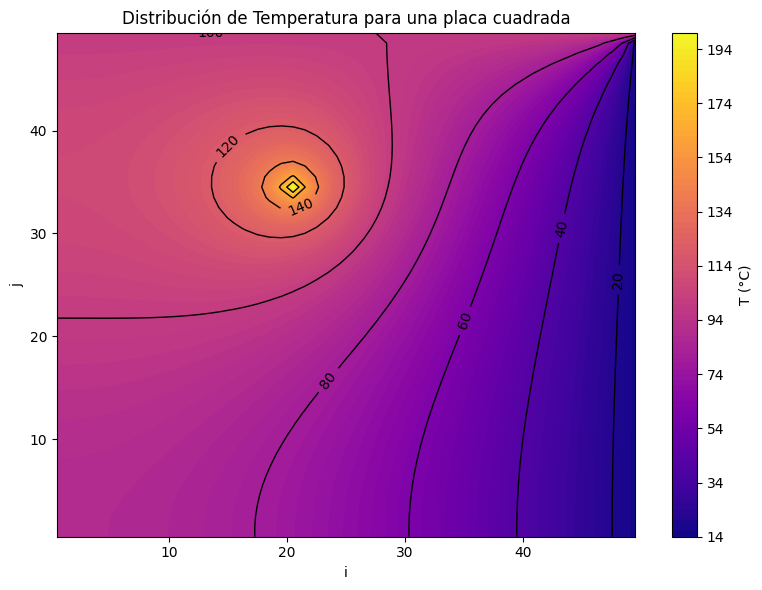

In [18]:
cond_contor = {'A':100,'B':15,'C':0,'D':0}

typ_cond_contorno = {'A':'temp','B':'temp','C':'flu','D':'flu'}

Nx = 50
Ny = 50
dx = 0.001
dy = 0.001
k = 205     #   Material considerado

hot_point = {'i': 20, 'j': 15, 'T': 200}

T = temp_chapa_P(cond_contor, Nx, Ny, typ_cond_contorno, dx, dy, k, hot_point)

graficarChapa(T,Nx,Ny)